In [1]:
## tools

from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import ArxivAPIWrapper,WikipediaAPIWrapper

In [ ]:
##Agent 1

api_wrapper_arxiv=ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500) 
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv,description="Query arxiv papers")
print(arxiv.name)

arxiv


In [3]:
arxiv.invoke("What is the latest research on quantum computing?")

'Published: 2023-05-23\nTitle: Fast and energy-efficient non-volatile III-V-on-silicon photonic phase shifter based on memristors\nAuthors: Zhuoran Fang, Bassem Tossoun, Antoine Descos, Di Liang, Xue Huang, Geza Kurczveil, Arka Majumdar, Raymond G. Beausoleil\nSummary: Silicon photonics has evolved from lab research to commercial products in the\npast decade as it plays an increasingly crucial role in data communication for\nnext-generation data centers and high performance computing1. Recently,\nprogr'

In [4]:
arxiv.invoke("attention is all you need")

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with low latencies remains challenging due to the quadratic input length\ncomplexity of the attention layers. In this work, we investigate the effect of\ndropping MLP and attention layers at inference time o"

In [ ]:
## Agent 2

api_wrapper_wiki=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=500)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
wiki.name

'wikipedia'

In [8]:
from dotenv import load_dotenv
load_dotenv()

import os

os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [ ]:
### Tavily Search Tool agent 3
from langchain_community.tools.tavily_search import TavilySearchResults

tavily = TavilySearchResults()

In [10]:
tavily.invoke("Provide me the recent data science news in power engineering?")

[{'title': 'Data Analytics News - Power Engineering News - EEPower',
  'url': 'https://eepower.com/news/category/utilities/data-analytics/',
  'content': 'Siemens recently released two software programs to help utilities model the impact of distributed energy resources on their networks. News Mar 21, 2024 by',
  'score': 0.7668008},
 {'title': 'Power Engineering: Power Industry And Energy News',
  'url': 'https://www.power-eng.com/',
  'content': 'Learn How to Work Smarter in the Field\n\nJune 4, 2025 @ 2:00 pm – 3:00 pm EDT\n\nAdvancing Power Electronics Cooling: Innovations in Pumped Two-Phase Systems\n\nMay 29, 2025 @ 11:00 am – 12:00 pm EDT\n\nDTECH Data Centers & AI 2025\n\nMay 27-29, 2025 | San Jose, CA\n\nMore News\n\nNew York offshore wind project resumes construction after Trump’s stop work order\n\nCould this utility’s next-gen storage test be a game changer?\n\nLess than 2 weeks to go: Submit case studies and apply to speak at POWERGEN 2026 [...] Purdue University reactor pa

In [11]:
## combine all these tools in the list
tools=[arxiv, wiki, tavily]

In [19]:
## Initialize the LLM Model
from langchain_groq import ChatGroq

#llm=ChatGroq(model="deepseek-r1-distill-llama-70b", temperature=0.1, max_tokens=1000)
llm=ChatGroq(model="compound-beta", temperature=0.1, max_tokens=1000)


In [15]:
llm.invoke("give me recent papers on data science or  machine learning in power engineering and energy science ")

AIMessage(content='<think>\nOkay, so I need to find recent papers on data science or machine learning in power engineering and energy science. Hmm, where do I start? I remember the user mentioned some databases like IEEE Xplore, ScienceDirect, SpringerLink, and arXiv. Maybe I should check those first. \n\nLet me think about what specific topics I\'m interested in. The user listed some areas like renewable energy integration, energy forecasting, smart grids, fault detection, energy storage, demand response, power system optimization, and electric vehicles. I\'m particularly interested in renewable energy integration and energy forecasting. \n\nI guess I should start with IEEE Xplore since it\'s a major database for engineering topics. I\'ll need to search using keywords like "machine learning renewable energy" or "data science energy forecasting." But wait, how do I ensure the papers are recent? Maybe I can set a filter for the last two years, say 2023 and 2024.\n\nWait, I don\'t have a

In [16]:
llm_with_tools=llm.bind_tools(tools=tools)


In [17]:
## Execute this call
llm_with_tools.invoke("What is the recent news on AI in power engineering?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_g1pr', 'function': {'arguments': '{"query":"AI in power engineering recent news"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 174, 'prompt_tokens': 283, 'total_tokens': 457, 'completion_time': 0.653498025, 'prompt_time': 0.025112831, 'queue_time': 0.220962317, 'total_time': 0.678610856}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--e948f0a7-1657-4fcd-8e77-8c2885e80ed7-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'AI in power engineering recent news'}, 'id': 'call_g1pr', 'type': 'tool_call'}], usage_metadata={'input_tokens': 283, 'output_tokens': 174, 'total_tokens': 457})

In [21]:
## Execute this call
llm_with_tools.invoke("What is the latest research on AI in power engineering?")


AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_w1jt', 'function': {'arguments': '{"query":"AI in power engineering"}', 'name': 'arxiv'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 308, 'prompt_tokens': 283, 'total_tokens': 591, 'completion_time': 1.395195433, 'prompt_time': 0.019024467, 'queue_time': 0.05319652799999999, 'total_time': 1.4142199}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--55222b44-f7e5-40e3-8402-4ebcf283e194-0', tool_calls=[{'name': 'arxiv', 'args': {'query': 'AI in power engineering'}, 'id': 'call_w1jt', 'type': 'tool_call'}], usage_metadata={'input_tokens': 283, 'output_tokens': 308, 'total_tokens': 591})

In [20]:
## Execute this call
llm_with_tools.invoke("What is machine learning?")

AIMessage(content='Machine learning is a subset of artificial intelligence (AI) that involves the use of algorithms and statistical models to enable machines to perform a specific task without using explicit instructions, relying instead on patterns and inference. In simpler terms, machine learning is a way to train computers to make decisions or predictions based on data. \n\nThe process typically involves feeding large amounts of data into an algorithm, which then learns from the data and improves its performance over time. There are different types of machine learning, including:\n\n1. **Supervised Learning**: The algorithm is trained on labeled data, where each example is paired with the correct output. This helps the model learn the relationship between inputs and outputs.\n\n2. **Unsupervised Learning**: The algorithm is trained on unlabeled data, and it aims to find patterns or groupings in the data without prior knowledge of the outputs.\n\n3. **Reinforcement Learning**: The al

## Workflow 

In [23]:
## State Schema
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage ## Human message or AI message
from typing import Annotated  ## labelling
from langgraph.graph.message import add_messages  ## Reducers in Langgraph

In [ ]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages] # add_message appends messages to the state variable messages, dont write anything. 
                                                        ##it is reducer cz we are not overwriting the messages variable
## message key variable that passes all nnodes, will be a list of human and AI messages that will be available on every of  langgraph flow
    

In [26]:
### Entire Chatbot With LangGraph
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition # tool path for llm, 

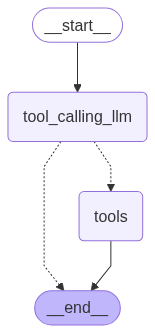

In [27]:
### Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm) # this node will call the llm with tools
builder.add_node("tools", ToolNode(tools))  # whatever tools we have defined above, we can use them in the graph

## Edgess
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", END)

graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [29]:
messages=graph.invoke({"messages":"research papers on data science in power engineering"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

research papers on data science in power engineering
================================== Ai Message ==================================
Tool Calls:
  arxiv (call_yhcz)
 Call ID: call_yhcz
  Args:
    query: data science in power engineering
================================= Tool Message =================================
Name: arxiv

Published: 2021-03-02
Title: On a Factorial Knowledge Architecture for Data Science-powered Software Engineering
Authors: Zheng Li
Summary: Given the data-intensive and collaborative trend in science, the software
engineering community also pays increasing attention to obtaining valuable and
useful insights from data repositories. Nevertheless, applying data science to
software engineering (e.g., mining software repositories) can be blindfold and
meaningless, if lacking a suitable knowledge arch


In [32]:
messages=graph.invoke({"messages":"Hi, My name is Waseek. how are you?"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Hi, My name is Waseek. how are you?
================================== Ai Message ==================================

Hello, Waseek! I'm just a computer program, so I don't have feelings, but I'm here and ready to help you with whatever you need. How can I assist you today?


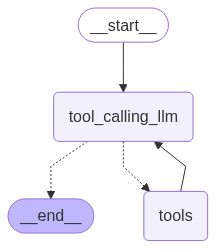

In [33]:
### Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

## Edgess
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "tool_calling_llm")

graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

In [34]:
messages=graph.invoke({"messages":"What is the recent AI news on Power Enginerring and then please tell me the recent research paper on NLP and AI Agent?"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is the recent AI news on Power Enginerring and then please tell me the recent research paper on NLP and AI Agent?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_84n2)
 Call ID: call_84n2
  Args:
    query: recent AI news Power Engineering
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Power Engineering: Power Industry And Energy News", "url": "https://www.power-eng.com/", "content": "Learn How to Work Smarter in the Field\n\nJune 4, 2025 @ 2:00 pm – 3:00 pm EDT\n\nDTECH Data Centers & AI 2025\n\nMay 27-29, 2025 | San Jose, CA\n\nAdvancing Power Electronics Cooling: Innovations in Pumped Two-Phase Systems\n\nMay 29, 2025 @ 11:00 am – 12:00 pm EDT\n\nMore News\n\nNew York offshore wind project resumes construction after Trump’s stop work order\

In [35]:
messages=graph.invoke({"messages":"do you know irtefa waseek?"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

do you know irtefa waseek?
================================== Ai Message ==================================
Tool Calls:
  wikipedia (call_6fht)
 Call ID: call_6fht
  Args:
    query: Irtefa Waseek
================================= Tool Message =================================
Name: wikipedia

No good Wikipedia Search Result was found
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_h755)
 Call ID: call_h755
  Args:
    query: Irtefa Waseek
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Kounsel: Employee Directory | ZoomInfo.com", "url": "https://www.zoominfo.com/pic/kounsel/1183896068", "content": "Irtefa Waseek. Advanced Sql Developer at Radiant Data Systems. Worked as Data Scientist. at Kounsel (2024-2025). email Irtefa Waseek Email direct Irtefa